# Import Library

In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import dataset

In [274]:
path = "C:/Users/julia/Downloads/auto-mpg(1).csv"
auto = pd.read_csv(path)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


## Profile detail

In [275]:
# There are 8 variables in the data:

#     mpg: miles per gallon
#     cyl: number of cylinders
#     disp: engine displacement (cu. inches) or engine size
#     hp: horsepower
#     wt: vehicle weight (lbs.)
#     acc: time taken to accelerate from O to 60 mph (sec.)
#     yr: model year
#     car name: car model name

In [276]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [277]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
car name        0
dtype: int64

In [278]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [279]:
auto['model year']

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model year, Length: 398, dtype: int64

In [280]:
# cope with missing data
auto.replace({'?':np.NaN}, inplace = True)
auto['horsepower'] = auto['horsepower'].astype('float')
auto.fillna(value = auto['horsepower'].mean(), axis= 0, inplace = True)
# change model year to datetime
# auto['model year'] = pd.to_datetime(auto['model year'], format = '%y')

# Plot the variables

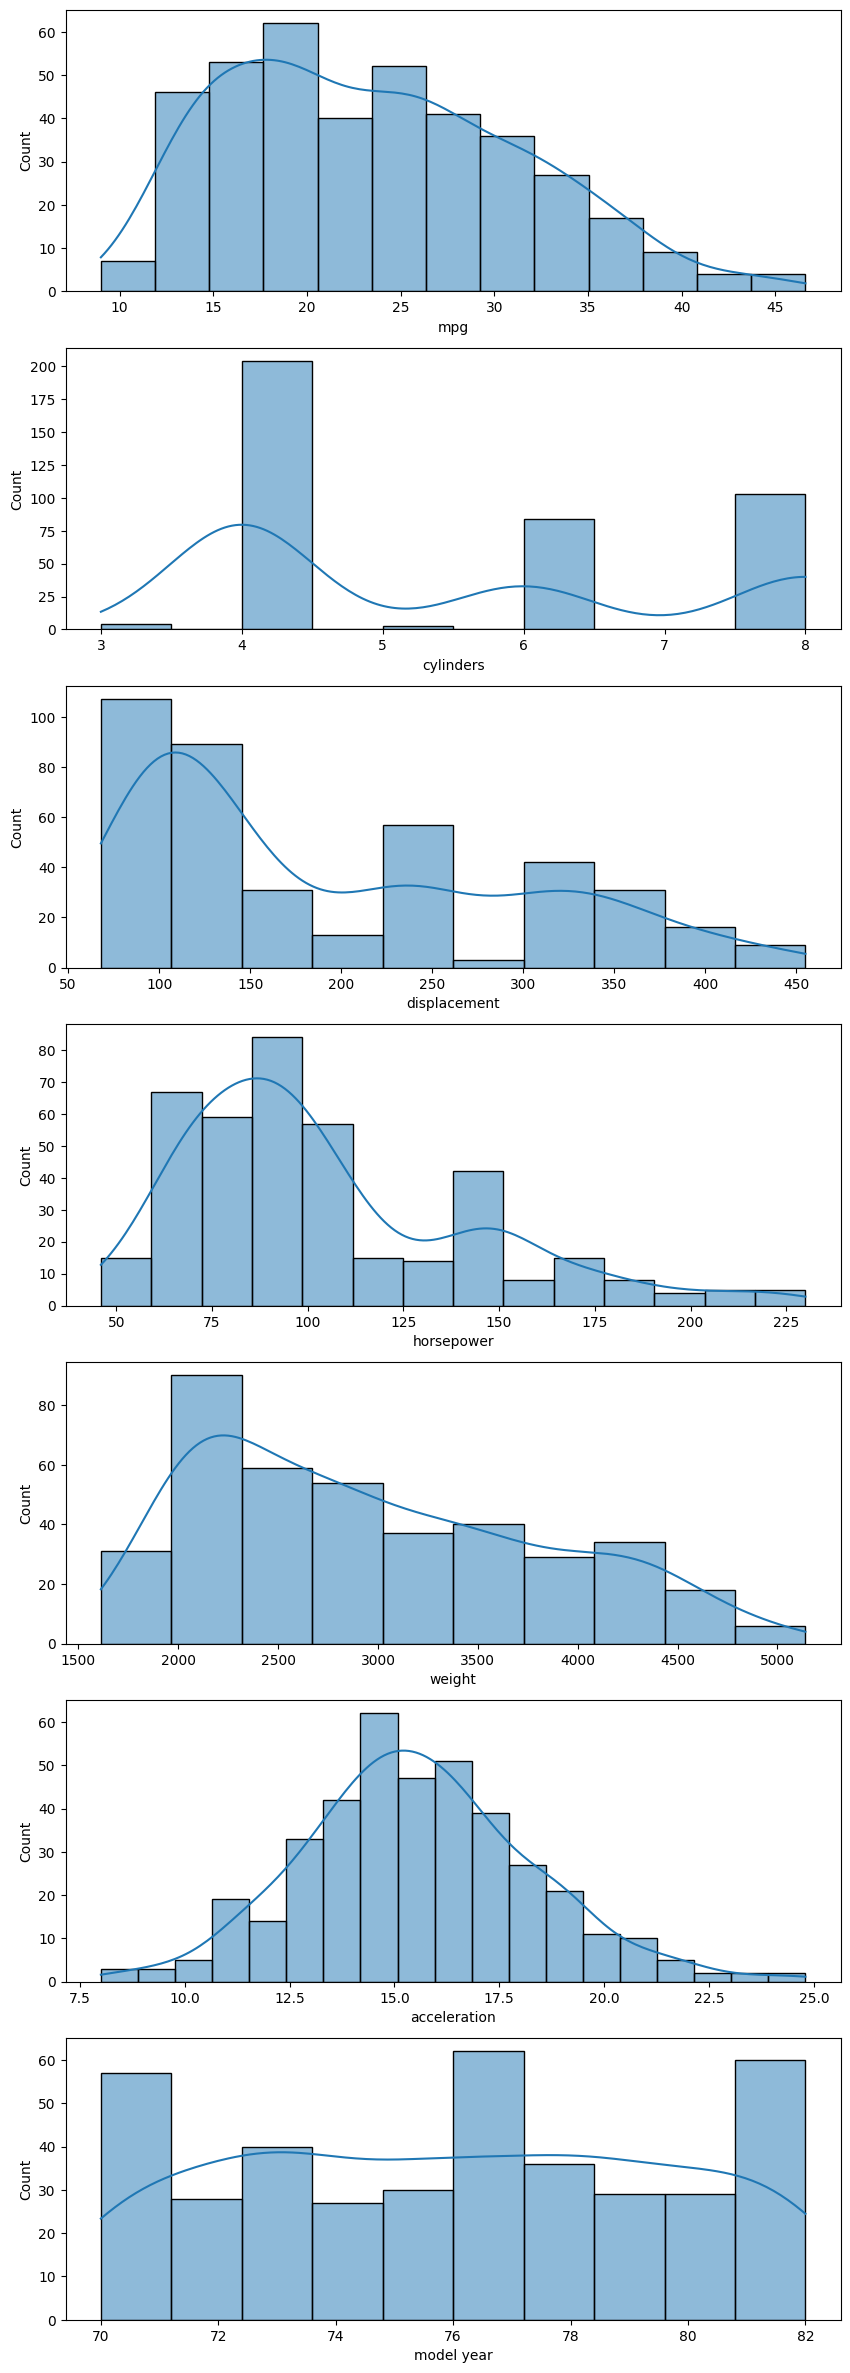

In [281]:
object_col = auto.select_dtypes('object').columns
numerical_col = auto.select_dtypes(exclude= 'object').columns
# plot all numerical variables hisplot
fig, axes = plt.subplots(7, 1, figsize = (10, 30))
axes = np.ravel(axes)
for i,j in enumerate(numerical_col):
  sns.histplot(data = auto, x = j, ax= axes[i], kde= True)
plt.show()

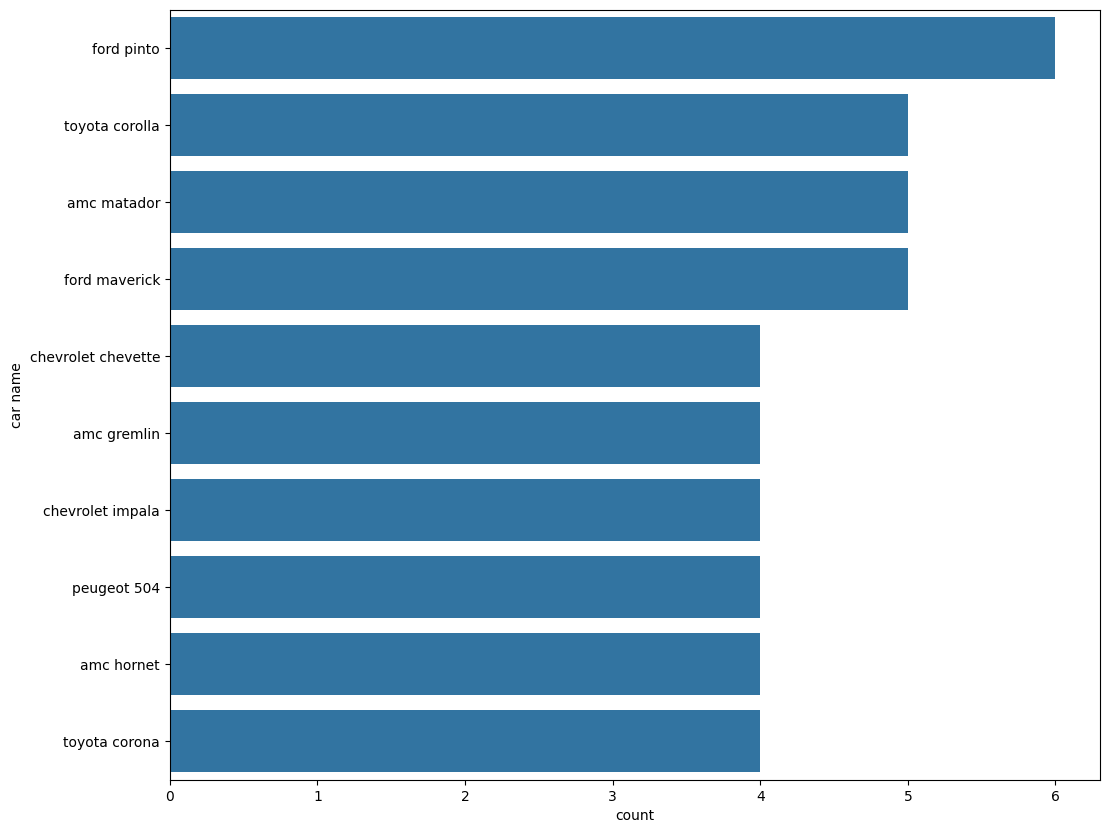

In [282]:
# plot only tip 5 car brandon which has most number of car
all_car =pd.DataFrame(auto['car name'].value_counts()[0:10]).reset_index()
fig, axes= plt.subplots(figsize = (12, 10))
sns.barplot(data = all_car, y = 'car name', x = 'count')
plt.show()

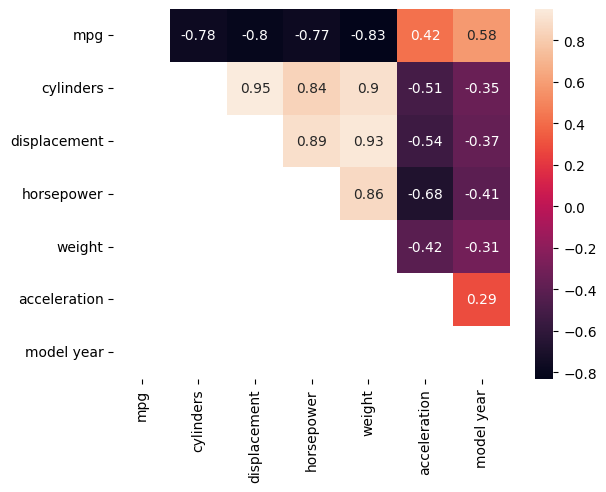

In [283]:
# plot heatmap for all numerical variables
cor = auto[numerical_col].corr()
matrik = np.ones_like(cor)
mask = np.tril(matrik, k = 0)
sns.heatmap(cor,annot= True, mask = mask)
plt.show()

# Standardized the dataset

In [284]:
# remove car name from dataset
auto1 = auto.copy()
auto1.drop(columns = ['car name'], inplace= True)
std = StandardScaler()
auto1_std = std.fit_transform(auto1)

# Use PCA

In [285]:
pca = PCA(n_components= 2)
pca.fit(auto1_std)
# pca ration sum
pca_rationsum = pca.explained_variance_ratio_.sum()
# use pca to transform dataset
auto1_pca = pd.DataFrame(pca.transform(auto1_std), columns= pca.get_feature_names_out())

# Plot dataset after PCA

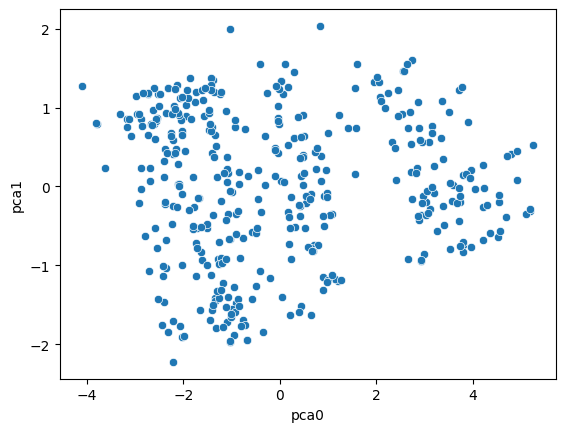

In [286]:
sns.scatterplot(data = auto1_pca, x = 'pca0', y = 'pca1')
plt.show()

# Use kmean to cluster

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


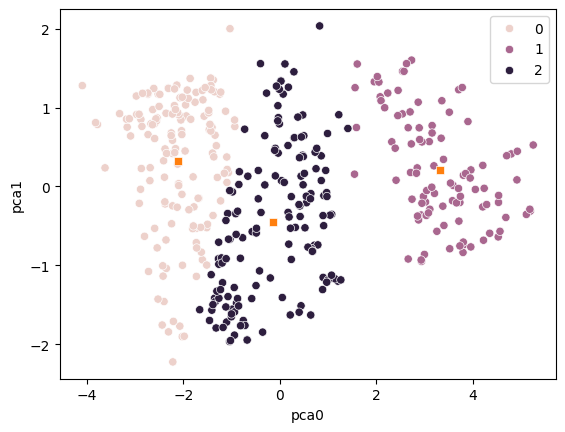

In [287]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++', n_init= 10, tol = 0.0001)
kmeans.fit(auto1_pca)
labels = kmeans.labels_
center = kmeans.cluster_centers_.T

# plot the clusters

sns.scatterplot(data = auto1_pca, x = 'pca0', y = 'pca1', hue = labels)
sns.scatterplot(x = center[0], y = center[1], marker = 's')
# sns.scatterplot(x = kmeans.cluster_centers_, y = kmeans.cluster_centers_)
plt.show()

# Decide the numbers of cluster

## Using sihouette score and Elbow to decide the number of clusters 

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmea

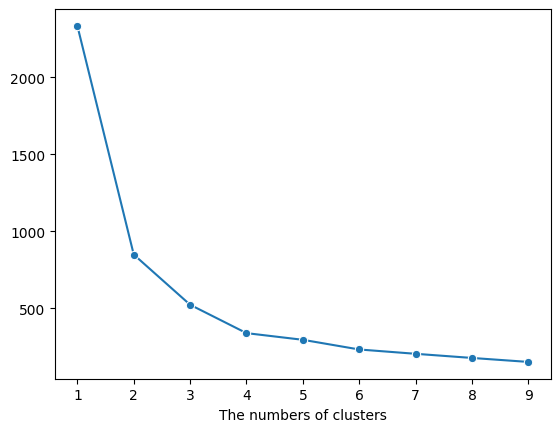

In [288]:
# use elbow to decide the number of cluster
# calculate the wcss( within-cluster  sum of squares value)
wcss = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(auto1_pca)
  wcss.append(kmeans.inertia_)

# plot the elbow plot
sns.lineplot(x= np.arange(1,10), y = wcss, marker = 'o')
plt.xlabel('The numbers of clusters')
plt.show()

In [289]:
# use silhouette score to decide the number of cluster
kmeans = KMeans(n_clusters = 3)
kmeans.fit(auto1_pca)
b = kmeans.labels_
unique_b = np.unique(b)

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


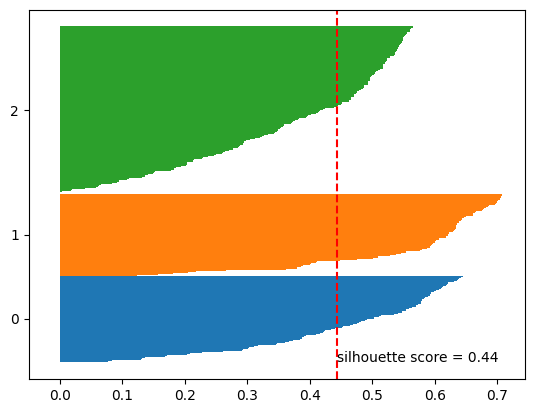

In [301]:
# silhouette plot 
silhouettescore = silhouette_samples(X = auto1_pca, labels = b, metric = 'euclidean')
y_upper, y_lower = 0, 0
yticks= []
score = silhouette_score(X = auto1_pca, labels= b, metric= 'euclidean')
for i in unique_b:
  cond1 = b == i
  y_upper = y_lower + len(silhouettescore[cond1])
  plt.barh(width=np.sort(silhouettescore[cond1]), y = range(y_lower, y_upper), height = 1)
  y_middle = (y_upper + y_lower)/2
  y_lower = y_lower + len(silhouettescore[cond1])
  yticks.append(y_middle)
plt.yticks(ticks=yticks, labels=range(0,3))
plt.axvline(x = score, color = 'red', linestyle = '--')
plt.text(x = score, y = 0, s = ('silhouette score = ' + str(np.round(score,2))))
plt.show()

In [316]:
# self definition function
def silhouette_plot(num_clu, data_pca):
  kmeans = KMeans(num_clu, init= 'k-means++')
  kmeans.fit(data_pca)
  b = kmeans.labels_
  unique_b = np.unique(b)
  silhouette = silhouette_samples(X = data_pca, labels= b)
  y_upper, y_lower = 0, 0
  yticks = []
  score = silhouette_score(data_pca, b)
  for i in unique_b:
    y_upper = y_lower + len(silhouette[b == i])
    plt.barh(width= np.sort(silhouette[b==i]), y = range(y_lower, y_upper), height = 1)
    y_middle = (y_upper + y_lower)/ 2
    y_lower = y_lower + len(silhouette[b== i])
    yticks.append(y_middle)
  plt.yticks(yticks, unique_b)
  plt.axvline(x = score, color = 'red', linestyle= '--')
  plt.text(x = score, y = 0, s = f'silhouette score= {np.round(score, 2)}')
  plt.show()

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


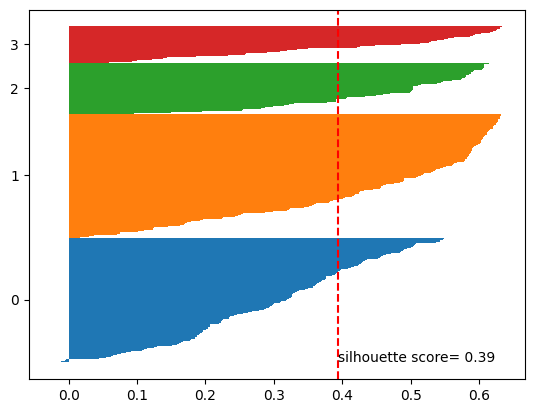

In [317]:
silhouette_plot(4, auto1_pca)